

**Data Dictionary**

- Booking_ID: unique identifier of each booking
- no_of_adults: Number of adults
- no_of_children: Number of Children
- no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
- no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
- type_of_meal_plan: Type of meal plan booked by the customer
- required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
- room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
- lead_time: Number of days between the date of booking and the arrival date
- arrival_year: Year of arrival date
- arrival_month: Month of arrival date
- arrival_date: Date of the month
- market_segment_type: Market segment designation
- repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
- no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
- no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
- avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic (in euros)
- no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
- booking_status: Flag indicating if the booking was canceled or not

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [1]:
pip install nbconvert[webpdf]


  Using cached pyppeteer-1.0.2-py3-none-any.whl (83 kB)
  Using cached pyee-8.2.2-py2.py3-none-any.whl (12 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 6.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
df_reservations = pd.read_csv('hotel_dataset_kaggle.csv')

In [3]:
df_reservations

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0       INN00001             2               0                     1   
1       INN00002             2               0                     2   
2       INN00003             1               0                     2   
3       INN00004             2               0                     0   
4       INN00005             2               0                     1   
...          ...           ...             ...                   ...   
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                      2       Meal Plan 1                           0   
1                      3      Not Selected                           0   
2                      1       Meal Plan 1                           0   
3                      2       Meal Plan 1                           0   
4                      1      Not Selected                           0   
...                  ...               ...                         ...   
36270                  6       Meal Plan 1                           0   
36271                  3       Meal Plan 1                           0   
36272                  6       Meal Plan 1                           0   
36273                  3      Not Selected                           0   
36274                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
0            Room_Type 1        224          2017             10   
1            Room_Type 1          5          2018             11   
2            Room_Type 1          1          2018              2   
3            Room_Type 1        211          2018              5   
4            Room_Type 1         48          2018              4   
...                  ...        ...           ...            ...   
36270        Room_Type 4         85          2018              8   
36271        Room_Type 1        228          2018             10   
36272        Room_Type 1        148          2018              7   
36273        Room_Type 1         63          2018              4   
36274        Room_Type 1        207          2018             12   

       arrival_date market_segment_type  repeated_guest  \
0                 2             Offline               0   
1                 6              Online               0   
2                28              Online               0   
3                20              Online               0   
4                11              Online               0   
...             ...                 ...             ...   
36270             3              Online               0   
36271            17              Online               0   
36272             1              Online               0   
36273            21              Online               0   
36274            30             Offline               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
0                                 0                                     0   
1                                 0                                     0   
2                                 0                                     0   
3                                 0                                     0   
4                                 0                                     0   
...                             ...                                   ...   
36270                             0                                     0   
36271                             0                                     0   
36272                            

In [4]:
df_reservations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [5]:
# Copy for cleaning
df_clean = df_reservations.copy()

In [6]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [7]:
df_clean['Booking_ID'] = df_clean['Booking_ID'].astype(str)
df_clean['type_of_meal_plan'] = df_clean['type_of_meal_plan'].astype(str)
df_clean['room_type_reserved'] = df_clean['room_type_reserved'].astype(str)
df_clean['market_segment_type'] = df_clean['market_segment_type'].astype(str)
df_clean['booking_status'] = df_clean['booking_status'].astype(str)

In [8]:
# Replace missing values in 'children' column with 0
df_clean['no_of_children'].fillna(0, inplace=True)

# Convert datatype of 'meal' column to categorical
df_clean['type_of_meal_plan '] = df_clean['type_of_meal_plan'].astype(
    'category')

# Convert datatype of 'reservation_status_date' column to datetime
#df_clean['reservation_status_date'] = pd.to_datetime(df_clean['reservation_status_date'])

df_clean['booking_status'] = df_clean['booking_status'].replace({
    'Not_canceled':
    'Confirmed',
    'Canceled':
    'Cancelled'
})

In [9]:
df_clean['arrival_datetime'] = df_clean[[
    'arrival_year', 'arrival_month', 'arrival_date'
]].apply(lambda x: '-'.join(x.astype(str)), axis=1)

In [10]:
df_clean = df_clean.drop(['arrival_year', 'arrival_month', 'arrival_date'],
                         axis=1)

In [11]:
# Convert arrival_datetime to datetime format
df_clean['arrival_datetime'] = pd.to_datetime(df_clean['arrival_datetime'],
                                              format='%Y-%m-%d',
                                              errors='coerce')

In [12]:
df_clean.describe()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
count  36275.000000    36275.000000          36275.000000       36275.000000   
mean       1.844962        0.105279              0.810724           2.204300   
std        0.518715        0.402648              0.870644           1.410905   
min        0.000000        0.000000              0.000000           0.000000   
25%        2.000000        0.000000              0.000000           1.000000   
50%        2.000000        0.000000              1.000000           2.000000   
75%        2.000000        0.000000              2.000000           3.000000   
max        4.000000       10.000000              7.000000          17.000000   

       required_car_parking_space     lead_time  repeated_guest  \
count                36275.000000  36275.000000    36275.000000   
mean                     0.030986     85.232557        0.025637   
std                      0.173281     85.930817        0.158053   
min                      0.000000      0.000000        0.000000   
25%                      0.000000     17.000000        0.000000   
50%                      0.000000     57.000000        0.000000   
75%                      0.000000    126.000000        0.000000   
max                      1.000000    443.000000        1.000000   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
count                  36275.000000                          36275.000000   
mean                       0.023349                              0.153411   
std                        0.368331                              1.754171   
min                        0.000000                              0.000000   
25%                        0.000000                              0.000000   
50%                        0.000000                              0.000000   
75%                        0.000000                              0.000000   
max                       13.000000                             58.000000   

       avg_price_per_room  no_of_special_requests  
count        36275.000000            36275.000000  
mean           103.423539                0.619655  
std             35.089424                0.786236  
min              0.000000                0.000000  
25%             80.300000                0.000000  
50%             99.450000                0.000000  
75%            120.000000                1.000000  
max            540.000000                5.000000

In [13]:
df_clean.describe(include='object')

Booking_ID type_of_meal_plan room_type_reserved market_segment_type  \
count       36275             36275              36275               36275   
unique      36275                 4                  7                   5   
top      INN00001       Meal Plan 1        Room_Type 1              Online   
freq            1             27835              28130               23214   

       booking_status  
count           36275  
unique              2  
top      Not_Canceled  
freq            24390

In [14]:
df_clean.duplicated().sum()

0

In [15]:
df_clean.isnull().sum()

Booking_ID                               0
no_of_adults                             0
no_of_children                           0
no_of_weekend_nights                     0
no_of_week_nights                        0
type_of_meal_plan                        0
required_car_parking_space               0
room_type_reserved                       0
lead_time                                0
market_segment_type                      0
repeated_guest                           0
no_of_previous_cancellations             0
no_of_previous_bookings_not_canceled     0
avg_price_per_room                       0
no_of_special_requests                   0
booking_status                           0
type_of_meal_plan                        0
arrival_datetime                        37
dtype: int64

In [16]:
df_clean.repeated_guest.value_counts()

0    35345
1      930
Name: repeated_guest, dtype: int64

In [17]:
df_clean['booking_status'] = df_clean['booking_status'].str.strip().str.lower()
df_clean['booking_status'].replace({'not_canceled': 'booked', 'canceled': 'cancelled'}, inplace=True)


In [18]:
print(df_clean['booking_status'].unique())


['booked' 'cancelled']


In [19]:
df_clean.booking_status

0           booked
1           booked
2        cancelled
3        cancelled
4        cancelled
           ...    
36270       booked
36271    cancelled
36272       booked
36273    cancelled
36274       booked
Name: booking_status, Length: 36275, dtype: object

In [20]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Booking_ID                            36275 non-null  object        
 1   no_of_adults                          36275 non-null  int64         
 2   no_of_children                        36275 non-null  int64         
 3   no_of_weekend_nights                  36275 non-null  int64         
 4   no_of_week_nights                     36275 non-null  int64         
 5   type_of_meal_plan                     36275 non-null  object        
 6   required_car_parking_space            36275 non-null  int64         
 7   room_type_reserved                    36275 non-null  object        
 8   lead_time                             36275 non-null  int64         
 9   market_segment_type                   36275 non-null  object        
 10

In [ ]:
import plotly.express as px

# Calculate percentage of booking status
booking_status_pct = df_clean['booking_status'].value_counts(normalize=True).reset_index()
booking_status_pct.columns = ['booking_status', 'percentage']
booking_status_pct['percentage'] = booking_status_pct['percentage'] * 100

# Plot histogram
fig = px.bar(booking_status_pct, x='booking_status', y='percentage', text='percentage', color='booking_status')
fig.update_layout(title='Booking Status Distribution')
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.show()


In [ ]:
import plotly.graph_objs as go
import plotly.offline as pyo
import pandas as pd


# Group the data by room type and calculate the sum of bookings and the count of adults and children
room_data = df_clean.groupby('room_type_reserved').agg({'Booking_ID': 'count',
                                                        'no_of_adults': 'sum',
                                                        'no_of_children': 'sum'}).reset_index()

# Create a stacked bar plot showing the total bookings and count of adults and children for each room type
trace1 = go.Bar(x=room_data['room_type_reserved'], y=room_data['no_of_adults'],
                name='No. of Adults')
trace2 = go.Bar(x=room_data['room_type_reserved'], y=room_data['no_of_children'],
                name='No. of Children')
trace3 = go.Bar(x=room_data['room_type_reserved'], y=room_data['Booking_ID'],
                name='Total Bookings')
data = [trace1, trace2, trace3]
layout = go.Layout(title='Bookings by Room Type and Guest Type', barmode='stack')
fig = go.Figure(data=data, layout=layout)

# Plot the figure
pyo.iplot(fig)


In [27]:
import plotly.express as px

# Group the data by room type, no of adults, no of children, lead time, and arrival datetime
grouped_data = df_clean.groupby(['room_type_reserved', 'no_of_adults', 'no_of_children', 'lead_time', 'arrival_datetime']).size().reset_index(name='bookings_count')

# Create the scatter plot
fig = px.scatter(grouped_data, x='lead_time', size='bookings_count', color='room_type_reserved',
                 hover_data={'no_of_adults': True, 'no_of_children': True},
                 labels={'arrival_datetime': 'Arrival Date Time'})
fig.update_layout(title='Bookings by Room Type, Guest Type, Lead Time, and Arrival Date Time')
fig.show()


In [24]:
import plotly.express as px

fig = px.histogram(df_clean, x="lead_time", y="arrival_datetime",
                   labels={'lead_time': 'Lead Time', 'arrival_datetime': 'Arrival Date Time'},
                   title='Bookings by Lead Time and Arrival Date Time')
fig.show()


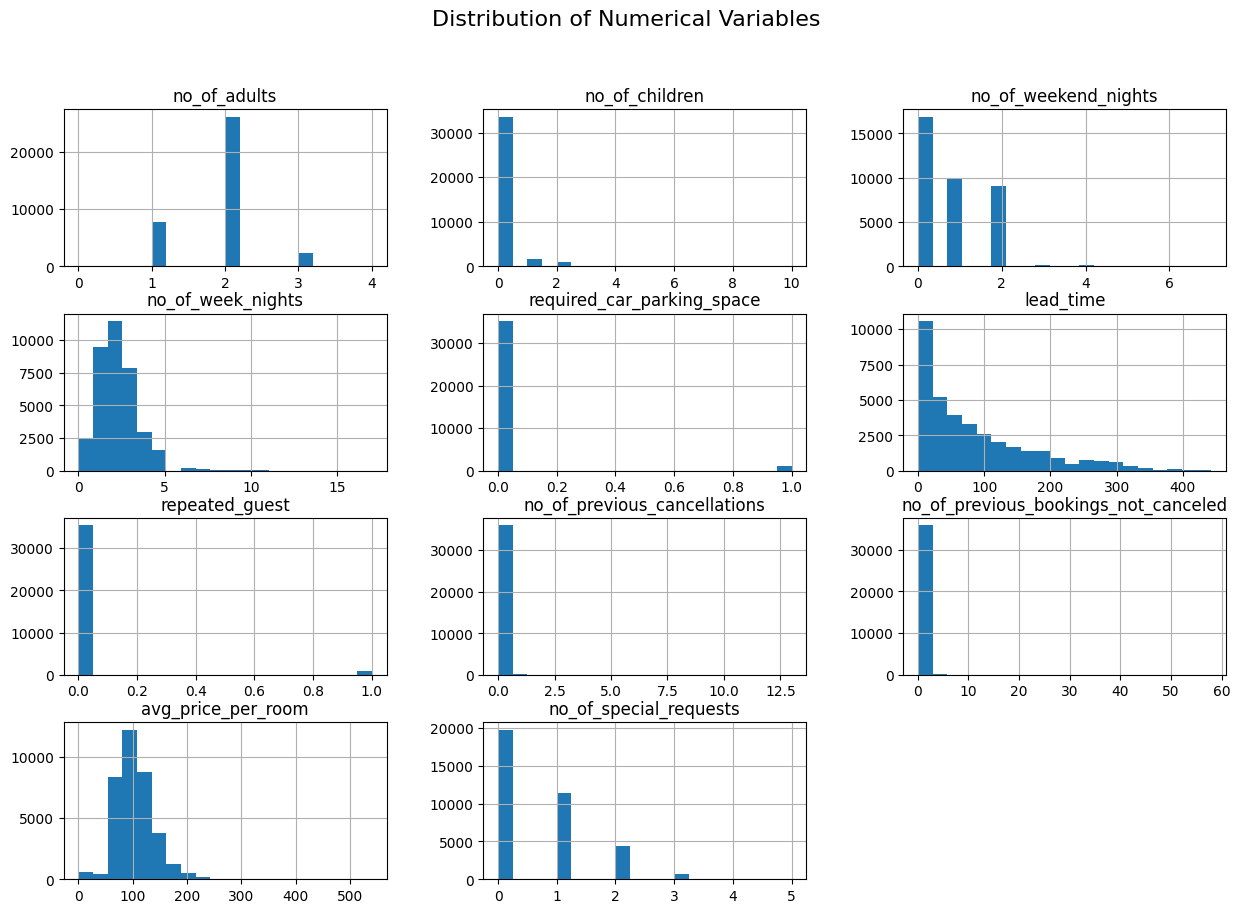

In [25]:
# Check the distribution of numerical variables
num_cols = [
    'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
    'no_of_week_nights', 'required_car_parking_space', 'lead_time',
    'repeated_guest', 'no_of_previous_cancellations',
    'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
    'no_of_special_requests'
]

df_num = df_clean[num_cols]
df_num.hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Variables', fontsize=16)
plt.show()

In [ ]:
q